# **Impact of Covid-19 on Unemployment in India**

## **Author: Adarsh S. Vimal**

- [LinkedIn](https://www.linkedin.com/in/adarshsvimal/)
- [GitHub](https://github.com/asvcodes)
- [Kaggle](https://www.kaggle.com/adarshshamshervimal)

## **Objective**:

The central focus of this analysis is to assess the impact of the COVID-19 pandemic on India's job market using exploratory data analysis techniques.

## **Dataset Details**:

Sources:  
- https://unemploymentinindia.cmie.com/
- https://www.kaggle.com/datasets/gokulrajkmv/unemployment-in-india

The dataset provides insights into the unemployment scenario across different Indian states:

- States: The states within India.
- Date: The date when the unemployment rate was recorded.
- Measuring Frequency: The frequency at which measurements were taken (Monthly).
- Estimated Unemployment Rate (%): The percentage of individuals unemployed in each state of India.
- Estimated Employed Individuals: The count of people currently employed.
- Estimated Labour Participation Rate (%): The proportion of the working population (age group: 16-64 years) participating in the labor force, either employed or actively seeking employment.

## Task

- Conduct an in-depth analysis of unemployment trends across Indian states over time, with a specific emphasis on monthly data.

- Explore the factors influencing unemployment rates and delve into variations in labor participation and employment levels.

- Offer valuable insights into the ramifications of these trends on the Indian job market.

In [1]:
# Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
import calendar
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")


pd.options.display.max_columns=100
sns.set_style('darkgrid')
plt.style.use('fivethirtyeight')
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.facecolor'] = '#00000000'

## **Data Loading, Exploration & Wrangling**

In [2]:
# Load the datasets and merge them to create a comprehensive dataframe

rawdf1 = pd.read_csv(r'Datasets\Unemployment in India.csv')
rawdf2 = pd.read_csv(r'Datasets\Unemployment_Rate_upto_11_2020.csv')

rawdf1.columns = [ str.lstrip(i) for i in rawdf1.columns]
rawdf2.columns = [str.lstrip(i) for i in rawdf2.columns]

In [3]:
rawdf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated Unemployment Rate (%)          740 non-null    float64
 4   Estimated Employed                       740 non-null    float64
 5   Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [4]:
rawdf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   267 non-null    object 
 1   Date                                     267 non-null    object 
 2   Frequency                                267 non-null    object 
 3   Estimated Unemployment Rate (%)          267 non-null    float64
 4   Estimated Employed                       267 non-null    int64  
 5   Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                 267 non-null    object 
 7   longitude                                267 non-null    float64
 8   latitude                                 267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [5]:
# Remove Null Values for merge
rawdf1.dropna(inplace = True)
rawdf1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated Unemployment Rate (%)          740 non-null    float64
 4   Estimated Employed                       740 non-null    float64
 5   Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 46.2+ KB


In [6]:
# Change Date dtype for merge
rawdf1['Date'] = pd.to_datetime(rawdf1['Date'])
rawdf2['Date'] = pd.to_datetime(rawdf2['Date'])

In [7]:
# Merge the two dataframes
df = rawdf1.merge(rawdf2,how='left',on=['Region','Date'],sort=True)
df = df[['Region', 'Date', 'Estimated Unemployment Rate (%)_x',
       'Estimated Employed_x', 'Estimated Labour Participation Rate (%)_x',
       'Estimated Unemployment Rate (%)_y', 'Estimated Employed_y',
       'Estimated Labour Participation Rate (%)_y', 'Region.1','Area']]
df

,Region,Date,Estimated Unemployment Rate (%)_x,Estimated Employed_x,Estimated Labour Participation Rate (%)_x,Estimated Unemployment Rate (%)_y,Estimated Employed_y,Estimated Labour Participation Rate (%)_y,Region.1,Area
0,Andhra Pradesh,2019-05-31,3.65,11999139.0,43.24,NaN,NaN,NaN,NaN,Rural
1,Andhra Pradesh,2019-05-31,6.09,4788661.0,37.45,NaN,NaN,NaN,NaN,Urban
2,Andhra Pradesh,2019-06-30,3.05,11755881.0,42.05,NaN,NaN,NaN,NaN,Rural
3,Andhra Pradesh,2019-06-30,3.80,4824630.0,36.76,NaN,NaN,NaN,NaN,Urban
4,Andhra Pradesh,2019-07-31,3.75,12086707.0,43.50,NaN,NaN,NaN,NaN,Rural
...,...,...,...,...,...,...,...,...,...,...
735,West Bengal,2020-04-30,15.63,9299466.0,41.20,17.41,26938836.0,39.90,East,Urban
736,West Bengal,2020-05-31,18.43,19115772.0,42.53,17.41,28356675.0,41.92,East,Rural
737,West Bengal,2020-05-31,15.22,9240903.0,40.67,17.41,28356675.0,41.92,East,Urban
738,West Bengal,2020-06-30,4.94,21225887.0,40.44,7.29,30726310.0,40.39,East,Rural


In [8]:
# After merge adjustments
df['Region.1'].fillna(method='bfill',inplace=True)
df

,Region,Date,Estimated Unemployment Rate (%)_x,Estimated Employed_x,Estimated Labour Participation Rate (%)_x,Estimated Unemployment Rate (%)_y,Estimated Employed_y,Estimated Labour Participation Rate (%)_y,Region.1,Area
0,Andhra Pradesh,2019-05-31,3.65,11999139.0,43.24,NaN,NaN,NaN,South,Rural
1,Andhra Pradesh,2019-05-31,6.09,4788661.0,37.45,NaN,NaN,NaN,South,Urban
2,Andhra Pradesh,2019-06-30,3.05,11755881.0,42.05,NaN,NaN,NaN,South,Rural
3,Andhra Pradesh,2019-06-30,3.80,4824630.0,36.76,NaN,NaN,NaN,South,Urban
4,Andhra Pradesh,2019-07-31,3.75,12086707.0,43.50,NaN,NaN,NaN,South,Rural
...,...,...,...,...,...,...,...,...,...,...
735,West Bengal,2020-04-30,15.63,9299466.0,41.20,17.41,26938836.0,39.90,East,Urban
736,West Bengal,2020-05-31,18.43,19115772.0,42.53,17.41,28356675.0,41.92,East,Rural
737,West Bengal,2020-05-31,15.22,9240903.0,40.67,17.41,28356675.0,41.92,East,Urban
738,West Bengal,2020-06-30,4.94,21225887.0,40.44,7.29,30726310.0,40.39,East,Rural


In [9]:
# Take mean of both values of 2020 for the Unemployment metrics
def update2020(df):
    for i in range(2, 5):
        for index, row in df.iterrows():  # Loop over each row
            if not pd.isnull(row[df.columns[i+3]]):  # Check if corresponding columns 5, 6, 7 have no null values
                df.at[index, df.columns[i]] = (row[df.columns[i]] + row[df.columns[i+3]]) / 2

update2020(df)

In [10]:
df.drop(['Estimated Unemployment Rate (%)_y', 'Estimated Employed_y',
       'Estimated Labour Participation Rate (%)_y'],inplace=True,axis=1)

In [11]:
# Detailed information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 7 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Region                                     740 non-null    object        
 1   Date                                       740 non-null    datetime64[ns]
 2   Estimated Unemployment Rate (%)_x          740 non-null    float64       
 3   Estimated Employed_x                       740 non-null    float64       
 4   Estimated Labour Participation Rate (%)_x  740 non-null    float64       
 5   Region.1                                   740 non-null    object        
 6   Area                                       740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 40.6+ KB


In [12]:
# Check for missing values
df.isnull().sum()

Region                                       0
Date                                         0
Estimated Unemployment Rate (%)_x            0
Estimated Employed_x                         0
Estimated Labour Participation Rate (%)_x    0
Region.1                                     0
Area                                         0
dtype: int64

In [13]:
# Check for Duplicates
df.loc[df.duplicated()]

,Region,Date,Estimated Unemployment Rate (%)_x,Estimated Employed_x,Estimated Labour Participation Rate (%)_x,Region.1,Area


In [14]:
# Rename Columns
df.columns = ['States', 'Date' ,'estUERT', 'estEmp(in M)','estLBRT','Region', 'Areatype']

df.index+=1
df

,States,Date,estUERT,estEmp(in M),estLBRT,Region,Areatype
1,Andhra Pradesh,2019-05-31,3.650,11999139.0,43.240,South,Rural
2,Andhra Pradesh,2019-05-31,6.090,4788661.0,37.450,South,Urban
3,Andhra Pradesh,2019-06-30,3.050,11755881.0,42.050,South,Rural
4,Andhra Pradesh,2019-06-30,3.800,4824630.0,36.760,South,Urban
5,Andhra Pradesh,2019-07-31,3.750,12086707.0,43.500,South,Rural
...,...,...,...,...,...,...,...
736,West Bengal,2020-04-30,16.520,18119151.0,40.550,East,Urban
737,West Bengal,2020-05-31,17.920,23736223.5,42.225,East,Rural
738,West Bengal,2020-05-31,16.315,18798789.0,41.295,East,Urban
739,West Bengal,2020-06-30,6.115,25976098.5,40.415,East,Rural


In [15]:
# Creating new columns for year and month
df['Year'] = df['Date'].dt.year

# Mapp integer month values to abbreviated Month names
df['Month'] = (df['Date'].dt.month).apply(lambda x : calendar.month_abbr[x])

#Drop Redundant Cols
df.drop(['Date'],axis=1,inplace=True)

In [16]:
# Changing dtype of Categorical Data for better calcs & visualisation
df['Areatype'] = df['Areatype'].astype('category')
df['Region'] = df['Region'].astype('category')

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['Month'] = pd.Categorical(df['Month'], categories=months, ordered=True)

# Create the lambda function to convert month names to month numbers
getMonthNo = lambda months_series: months_series.cat.codes + 1

In [17]:
# Order the Cols
df = df[['States','Year', 'Month', 
         'estUERT' , 'estLBRT','estEmp(in M)', 
         'Region','Areatype']]
df

,States,Year,Month,estUERT,estLBRT,estEmp(in M),Region,Areatype
1,Andhra Pradesh,2019,May,3.650,43.240,11999139.0,South,Rural
2,Andhra Pradesh,2019,May,6.090,37.450,4788661.0,South,Urban
3,Andhra Pradesh,2019,Jun,3.050,42.050,11755881.0,South,Rural
4,Andhra Pradesh,2019,Jun,3.800,36.760,4824630.0,South,Urban
5,Andhra Pradesh,2019,Jul,3.750,43.500,12086707.0,South,Rural
...,...,...,...,...,...,...,...,...
736,West Bengal,2020,Apr,16.520,40.550,18119151.0,East,Urban
737,West Bengal,2020,May,17.920,42.225,23736223.5,East,Rural
738,West Bengal,2020,May,16.315,41.295,18798789.0,East,Urban
739,West Bengal,2020,Jun,6.115,40.415,25976098.5,East,Rural


In [18]:
# Round Estimated employed column for a better visualization
df[df.columns[5]] = round((df[df.columns[5]]/1000000),2)

df.head(2)

,States,Year,Month,estUERT,estLBRT,estEmp(in M),Region,Areatype
1,Andhra Pradesh,2019,May,3.65,43.24,12.00,South,Rural
2,Andhra Pradesh,2019,May,6.09,37.45,4.79,South,Urban


## **Exploratory Analysis and Visualizations**

In [19]:
# Descriptive Statistics
df_stat = df[df.columns[3:6]]
round(df_stat.describe(),2)

,estUERT,estLBRT,estEmp(in M)
count,740.00,740.00,740.00
mean,11.60,42.75,8.67
std,10.20,7.88,9.19
min,0.00,15.05,0.08
25%,4.71,38.46,1.79
50%,8.41,41.18,5.78
75%,15.77,45.44,12.77
max,76.29,72.57,52.61


- *Mean Unemployment Rate: 11.79%*
- *Median Unemployment Rate: 8.35%*
- *Standard Deviation of Unemployment Rate: 10.72%*

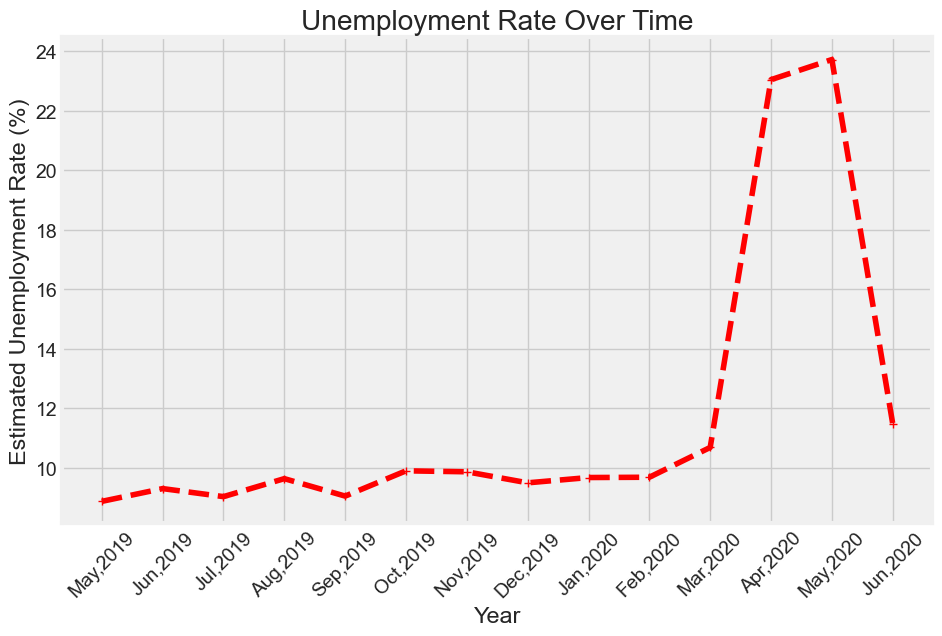

In [20]:
# Grouping the data by Date and calculate the mean unemployment rate for each date

mean_unemp = df.groupby(['Year','Month'])[df.columns[3]].mean()
mean_unemp.to_frame()
mean_unemp = mean_unemp.reset_index().dropna().reset_index(drop=True)
mean_unemp['Year-Month'] = mean_unemp.apply(lambda row: f"{row['Month']},{row['Year']}", axis=1)

# Create a line plot
plt.plot(mean_unemp['Year-Month'], 
         mean_unemp[df.columns[3]], 
         marker='+', linestyle='--', color='red')
plt.xlabel('Year')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Unemployment Rate Over Time')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

- *The plot reveals periods of particularly high unemployment rates, exceeding 20%, starting in March and ending in Jun of 2020.*

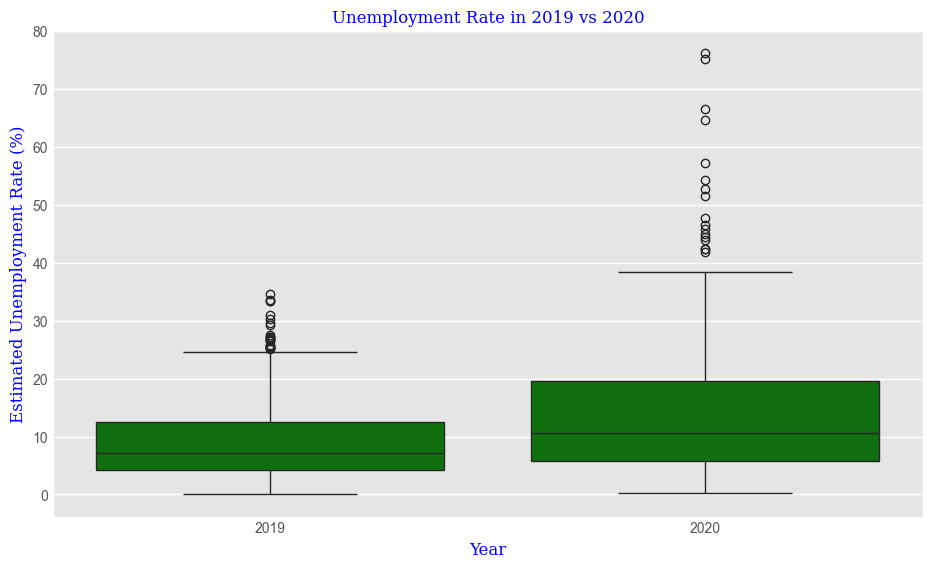

In [21]:
# Analysing the 'Estimated Unemployment Rate' column using Boxplot for years 2019 and 2020
plt.style.use('ggplot')
sns.boxplot(y = df[df.columns[3]], x = df[df.columns[1]], color ='green')

font = {'family': 'serif', 'color': 'blue', 'weight': 'normal', 'size': 12}
plt.xlabel('Year', fontdict=font)
plt.ylabel('Estimated Unemployment Rate (%)', fontdict=font)
plt.title('Unemployment Rate in 2019 vs 2020', fontdict=font)
plt.show()

- *Due to the lockdown imposed in the wake of Covid-19 pandemic, there was sudden increase in the Unemployment Rate in 2020.*

In [22]:
# Bar plot of average Unemployment Rate by State

df_unemp = df[[df.columns[3], df.columns[0]]].groupby(df.columns[0]).mean().reset_index()
df_unemp = df_unemp.sort_values(df.columns[3])
fig = px.bar(df_unemp, x=df.columns[0], y=df.columns[3], color=df.columns[0],
             labels={df.columns[0] : 'States', df.columns[3] : 'Average Unemployment Rate (%)'},
             title='Average Unemployment Rate in each State:', template='plotly_white')
fig.show()

*Overall unemployment rate was high for*
- Tripura
- Haryana
- Jharkhand
- Bihar

*Overall Lowest unemployment rate was for*
- Meghalaya
- Odisha
- Assam
- Utarakhand

In [23]:
# Box plot of Unemployment Rate by State

fig = px.box(df, x=df.columns[0], y=df.columns[3], color=df.columns[0],
             labels={df.columns[0] : 'States', df.columns[3] : 'Unemployment Rate (%)'},
             title='Unemployment Rate Per States', template='plotly')

fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

- *These box plots show extreme variablity in the unemployment rate for all the sates especially in one side (skewed).*

In [24]:
# Sunburst chart showing unemployment rate in each Areatype and state

fig = px.sunburst(df, path=[df.columns[7], df.columns[0]], values=df.columns[3],
                  title='Sunburst Plot of Estimated Unemployment Rate by States and Areatype',
                  height=650, template='ggplot2')
fig.show()

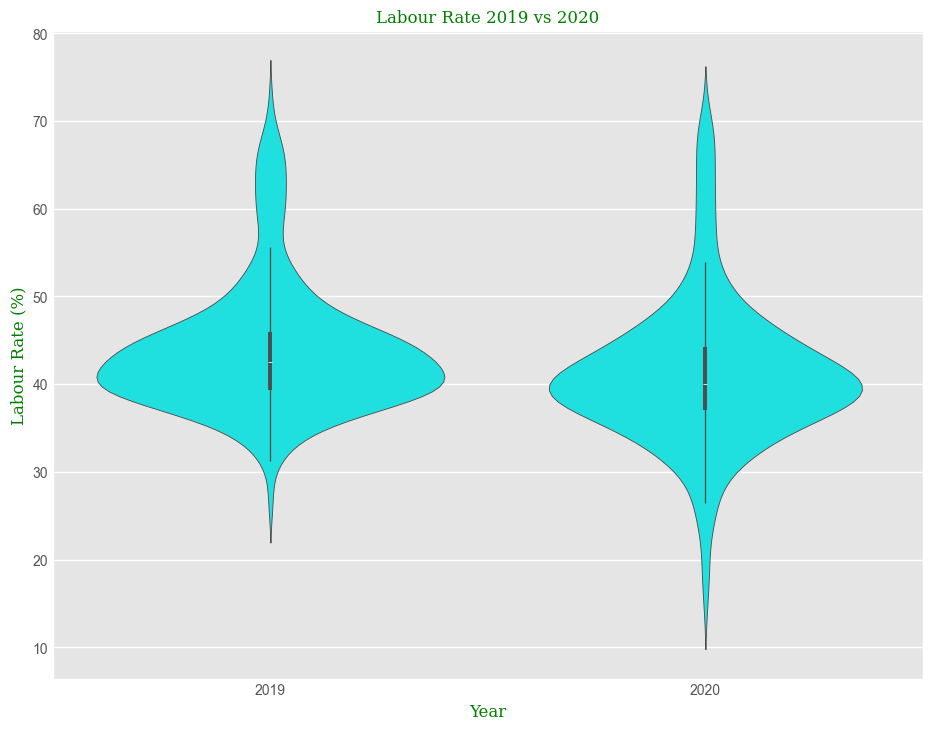

In [25]:
# Analysing the 'Labour Rate' column with Violin Plot
plt.figure(figsize=(10,8))
plt.style.use('ggplot')
sns.violinplot(y = df[df.columns[4]], x = df[df.columns[1]], color ='cyan')

font = {'family': 'serif', 'color': 'green', 'weight': 'normal', 'size': 12}
plt.xlabel('Year', fontdict=font)
plt.ylabel('Labour Rate (%)', fontdict=font)
plt.title('Labour Rate 2019 vs 2020', fontdict=font)
plt.show()

- *Labour Rate shows high variablity in 2020 due to the lockdown in wake of Covid 19.*

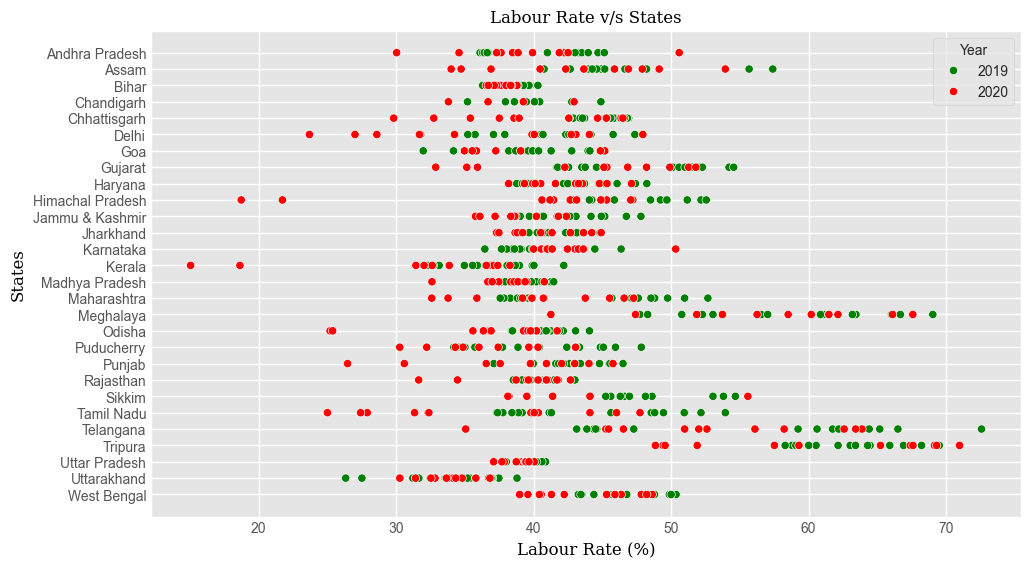

In [26]:
# Scatter plot of labour Rate by State
plt.style.use('ggplot')
sns.scatterplot(x = df[df.columns[4]], y = df[df.columns[0]], hue = df[df.columns[1]], palette =['green','red'])

font = {'family': 'serif', 'color': 'black', 'weight': 'normal', 'size': 12}
plt.xlabel('Labour Rate (%)', fontdict=font)
plt.ylabel('States', fontdict=font)
plt.title('Labour Rate v/s States', fontdict=font)
plt.show()

- *The Labour Rate is shwoing decreasing tendecy during 2020 for all the states, as red dots are a little left shifted*

In [27]:
# Bar plot of average Labour Rate by States

df_lr = df[[df.columns[4], df.columns[0]]].groupby(df.columns[0]).mean().reset_index()
df_lr = df_lr.sort_values(df.columns[4])
fig = px.bar(df_lr, x=df.columns[0], y=df.columns[4], color=df.columns[0],
             labels={df.columns[0] : 'States', df.columns[4]: 'Labour Rate (%)'},
             title='Average Labour Rate in each States', template='gridon')
fig.show()

In [28]:
# Descriptive Statistics based on Areatype

Areatype_stats = df.groupby(['Areatype'])[df.columns[3:6]]
round(Areatype_stats.describe(),2).T

Areatype             Rural   Urban
estUERT      count  359.00  381.00
             mean    10.44   12.69
             std      9.83   10.43
             min      0.00    0.00
             25%      4.24    5.81
             50%      6.97    9.68
             75%     14.10   17.30
             max     75.18   76.29
estLBRT      count  359.00  381.00
             mean    44.17   41.41
             std      8.60    6.87
             min     15.05   18.64
             25%     39.06   37.76
             50%     42.38   40.43
             75%     47.11   44.57
             max     72.57   70.97
estEmp(in M) count  359.00  381.00
             mean    11.13    6.35
             std     10.61    6.85
             min      0.08    0.09
             25%      2.24    1.03
             50%      8.40    4.63
             75%     15.54    9.69
             max     52.61   36.55

- *The Mean and Median Unemployment rate were higher for Urban areas*

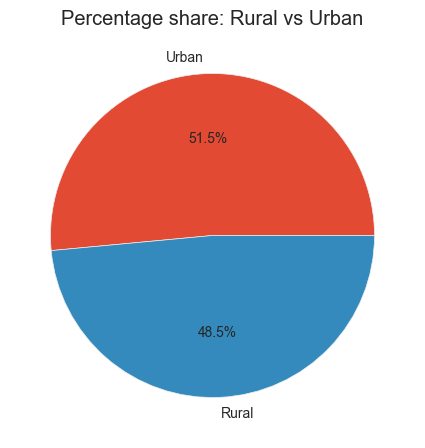

In [29]:
# Pie chart for Rural and Urban count

plt.figure(figsize=[6, 5])
plt.pie(df[df.columns[7]].value_counts(), labels=df[df.columns[7]].value_counts().index, autopct='%1.1f%%')
plt.title('Percentage share: Rural vs Urban')
plt.show()

- *This shows the dataset was taken almost equally from both urban and rural areas*

In [30]:
# Average Unemployment Rate in each Areatype

df_ar_unemp = df[[df.columns[3], df.columns[7]]].groupby(df.columns[7]).mean().reset_index()
df_ar_unemp = df_ar_unemp.sort_values(df.columns[3])
fig = px.bar(df_ar_unemp, x=df.columns[7], y=df.columns[3], color=df.columns[7],
             labels={df.columns[7]: 'Areatype', df.columns[3] : 'Average Unemployment Rate (%)'},
             title='Average Unemployment Rate in each Areatype', template='gridon')
fig.show()

- *The Mean Unemployment Rate was higher for Urban areas*

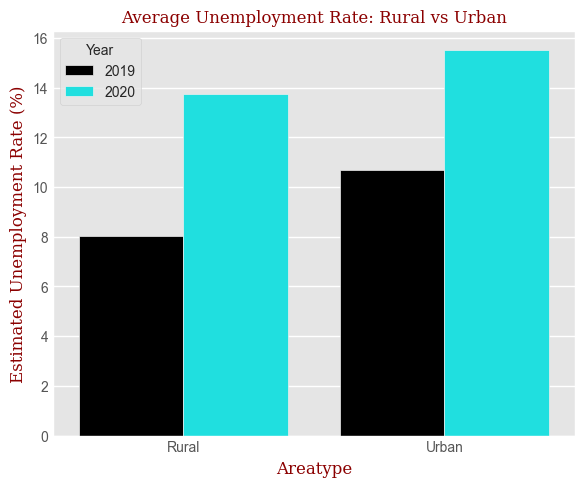

In [31]:
# Mean Unemploymnet rate in each Areatype for 2019 vs 2020

plt.figure(figsize = [6,5])
palette ={2019: "black", 2020: "cyan"}
sns.barplot(data = df, x = df.columns[7], y=df.columns[3], estimator='mean', hue='Year', errorbar=None, palette=palette)

font = {'family': 'serif', 'color': 'darkred', 'weight': 'normal', 'size': 12}
plt.xlabel(df.columns[7], fontdict=font)
plt.ylabel('Estimated Unemployment Rate (%)', fontdict=font)
plt.title('Average Unemployment Rate: Rural vs Urban', fontdict=font)
plt.show()

- *Both Rural and Urban areas had higher unemployment rate in 2020 than 2019.*
- *Urban areas had higher unemployment rate than rural areas.*

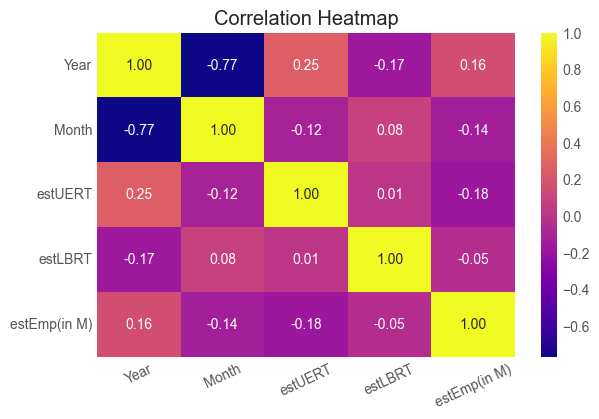

In [32]:
# Calculate correlation matrix
df_htmp= df[df.columns[1:6]]
df_htmp[df.columns[2]] = getMonthNo(df[df.columns[2]])
htmp = df_htmp.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(htmp, annot=True, cmap='plasma', fmt='.2f')
plt.xticks(rotation=25)
plt.title('Correlation Heatmap')
plt.show()

- *When unemployment rates go up, the number of employed people tends to go down, showing an opposite relationship.*
- *The effect of year on unemployment in this dataset is clear from the correlation coeeficient.*



In [33]:
# Scatter matrix cosidering the employed and unemployed rates

fig = px.scatter_matrix(df, template='plotly',
                        dimensions=df.columns[3:6],
                        color=df.columns[1])
fig.show()

### Lockdown Impact

In [34]:
# Creating new dataframes for before and after lockdown period during the same months
MM = df[df.columns[2]]
YYYY = df[df.columns[1]]
before_lockdown = df[(MM >= 'Apr') & (MM <= 'Jun') & (YYYY ==2019)]
after_lockdown = df[(MM >= 'Apr') & (MM <= "Jun") & (YYYY ==2020)]

In [35]:
# Calculating the mean unemployment rate before lockdown by state

bf_lockdown= before_lockdown.groupby(df.columns[0])[df.columns[3]].mean().reset_index()

# Calculating the mean unemployment rate after lockdown by state

af_lockdown = after_lockdown.groupby(df.columns[0])[df.columns[3]].mean().reset_index()

# Combining the mean unemployment rates before and after lockdown by state

bna = pd.merge(bf_lockdown, af_lockdown, on=df.columns[0])

bna.columns=['States','Unemployment Rate Before Lockdown','Unemployment Rate After Lockdown']
bna[1:].dtype = float
bna.head()

,States,Unemployment Rate Before Lockdown,Unemployment Rate After Lockdown
0,Andhra Pradesh,4.1475,14.764167
1,Assam,6.7825,6.330000
2,Bihar,13.1650,36.897500
3,Chandigarh,15.3750,7.220000
4,Chhattisgarh,9.5300,12.113333


In [36]:
bna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   States                             28 non-null     object 
 1   Unemployment Rate Before Lockdown  28 non-null     float64
 2   Unemployment Rate After Lockdown   28 non-null     float64
dtypes: float64(2), object(1)
memory usage: 804.0+ bytes


In [37]:
# Percentage change in unemployment rate

bna['PCT Change in UER'] = (bna[bna.columns[1:]].pct_change(axis=1)[bna.columns[2]]*100).round(-1)
pctUER = bna.sort_values('PCT Change in UER')
pctUER

,States,Unemployment Rate Before Lockdown,Unemployment Rate After Lockdown,PCT Change in UER
3,Chandigarh,15.3750,7.220000,-50.0
1,Assam,6.7825,6.330000,-10.0
24,Tripura,29.0425,27.101667,-10.0
21,Sikkim,7.9800,7.195000,-10.0
10,Jammu & Kashmir,16.9475,14.925000,-10.0
9,Himachal Pradesh,14.3550,14.803333,0.0
4,Chhattisgarh,9.5300,12.113333,30.0
19,Punjab,12.0100,15.998333,30.0
16,Meghalaya,6.1125,7.848000,30.0
25,Uttar Pradesh,11.8525,18.350833,50.0


In [38]:
# Percentage change in unemployment after lockdown
'''After Removing the Outliers Tamil Nadu and Puducherry'''
fig = px.bar(pctUER.iloc[:26,:], x=bna.columns[0],y=bna.columns[3],color=bna.columns[3],
            labels={bna.columns[0] : 'States', bna.columns[3] : '% Change in Unemployment'},
            title='% Change in Unemployment Rate from 2019 to 2020 for Apr-Jun ',
            color_continuous_scale = 'viridis', width=900, height=500)
fig.show()

In [39]:
# Bar for Tamil Nadu & Puducherry
fig = px.bar(pctUER.iloc[26:,:], x=bna.columns[0],y=bna.columns[3],color=bna.columns[3],
            labels={bna.columns[0] : 'States', bna.columns[3] : '% Change in Unemployment'},
            title='% Change in Unemployment Rate from 2019 to 2020 for Apr-Jun ',
            color_continuous_scale = 'viridis', width=900, height=500)
fig.show()

## **Observations**

### *Unemployment Rate*
- Mean Unemployment Rate: 11.79%
- Median Unemployment Rate: 8.35%
- Standard Deviation of Unemployment Rate: 10.72%
- Due to the lockdown imposed in the wake of Covid-19 pandemic, there was sudden increase in the Unemployment Rate in 2020.
- There were periods of particularly high unemployment rates, exceeding 20%, in May and June of 2020.
- Overall unemployment rate was high for
    - Tripura
    - Haryana
    - Jharkhand
    - Bihar

- Overall Lowest unemployment rate was for
    - Meghalaya
    - Odisha
    - Assam
    - Utaarakhand
- There was extreme variablity in the unemployment rate for all the sates especially in one side (skewed).

### *Labour Rate*
- Labour Rate shows high variablity in 2020 due to the lockdown in wake of Covid 19.
- The Labour Rate is shwoing decreasing tendecy during 2020 for all the states.

### *Rural vs Urban*
- The Mean and Median Unemployment rate were higher for Urban areas
- The dataset was taken almost equally from both urban and rural areas
- The Mean Unemployment Rate was higher for Urban areas
- Both Rural and Urban areas had higher unemployment rate in 2020 than 2019.
- Urban areas had higher unemployment rate than rural areas.

### *Most impacted States/Union Territories*

- Puducherry
- Jharkhand
- Bihar
- Haryana
- Tamil Nadu

